In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no values in the data set

In [5]:
for i in df.columns:
    print(i , df[i].unique())

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt [ 83311 215646 234721 ...  34066  84661 257302]
Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-o

As we can see, there are values with ? under work class column and occupation column



income is our target variable.

There are categorical variables and needs encoding.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

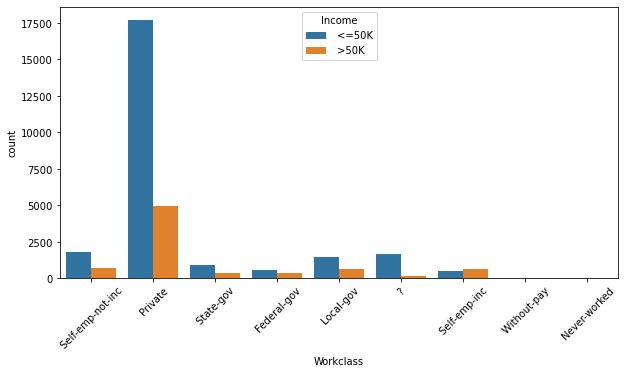

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(df['Workclass'],hue = df['Income'])
plt.xticks(rotation = 45)

In [14]:
count = 0
for i in df.Workclass:
    if i == ' ?':
        count+=1

print("count of ? is ", count)

count of ? is  1836


In [17]:
(df.Workclass == ' ?').sum()

1836

There are 1836 rows with ? values in it. They can be removed if data loss is under considerable limits

In [18]:
df.shape

(32560, 15)

In [21]:
float((1836/32560)*100)

5.638820638820639

In [22]:
100/5.638820638820639

17.734204793028322

In [23]:
17.734204793028322 * 1836

32560.0

There will be around 5.6% data loss

In this column, there are two values never worked and without pay.

These values has no sense for this problem as we are predicting about the income level. These can be removed.

In [25]:
(df.Workclass == ' Without-pay').sum()

14

In [26]:
 (df.Workclass == ' Never-worked').sum()

7

They are less in number and doesnt have a significant impact in modelling if removed.

There fore, lets remove the rows with these three values

In [28]:
df = df.drop(df[df['Workclass'] == ' ?'].index)
df = df.drop(df[df['Workclass'] == ' Without-pay'].index)
df = df.drop(df[df['Workclass'] == ' Never-worked'].index)

df.shape

(30703, 15)

In [30]:
(30703/32560) - 1

-0.0570331695331695

5.7% data is removed.

In [33]:
(df.Occupation == ' ?').sum()

0

Looks like the occupation and workclass columns have ? in same rows.

In [34]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Yes the ? values are removed from both the columns

In [35]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


There might be a relation between education and education number columns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

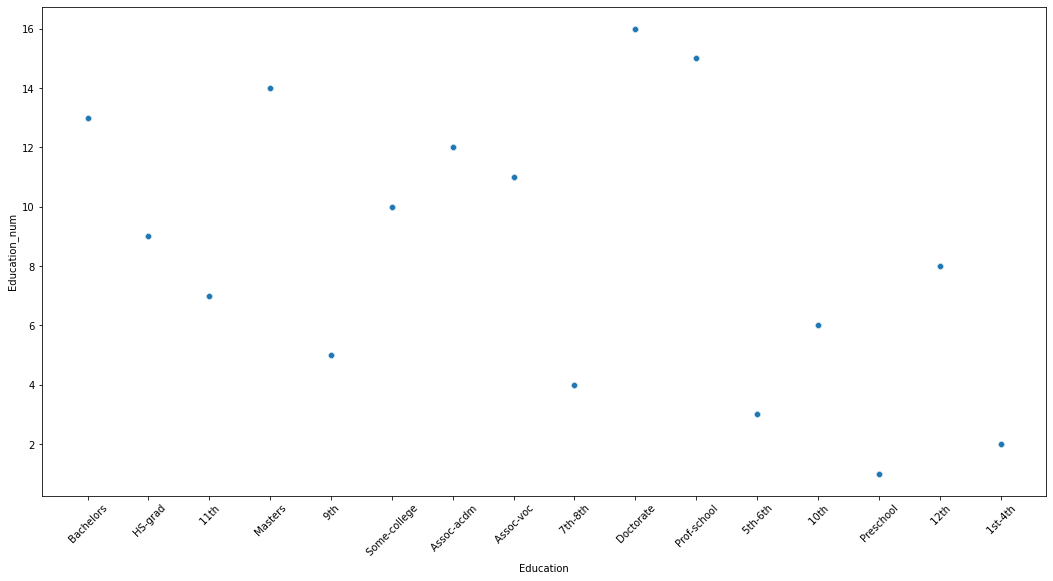

In [37]:
plt.figure(figsize = (18,9))
sns.scatterplot(x=df['Education'],y=df['Education_num'])
plt.xticks(rotation = 45)

As, from the above scatter plot we can see that for each specific x value there is only one specific y value

Yes, they are both the same but in different data types.

Lets see, which number is associated with which value for education

In [45]:
e = df['Education_num'].unique()

In [46]:
for i in e:
    print( 'the value for', i, 'is', df[df['Education_num'] == i]['Education'].unique())

the value for 13 is [' Bachelors']
the value for 9 is [' HS-grad']
the value for 7 is [' 11th']
the value for 14 is [' Masters']
the value for 5 is [' 9th']
the value for 10 is [' Some-college']
the value for 12 is [' Assoc-acdm']
the value for 11 is [' Assoc-voc']
the value for 4 is [' 7th-8th']
the value for 16 is [' Doctorate']
the value for 15 is [' Prof-school']
the value for 3 is [' 5th-6th']
the value for 6 is [' 10th']
the value for 1 is [' Preschool']
the value for 8 is [' 12th']
the value for 2 is [' 1st-4th']


The data column of education here can be treated as ordinal data.

We can drop one column.

Here, we can consider secondary school education for all the categories from pre school to 11th. Just to reduce the complexity

So, we drop the educational number columns as this was encoded before aggregation of values of pre school to 11th.

After that, we will encode the data

In [48]:
df.drop(columns=['Education_num'],inplace=True)

In [49]:
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' Pre-HS', inplace = True)
df['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5181
 Pre-HS          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

In [50]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,Pre-HS,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30703 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30703 non-null  int64 
 1   Workclass       30703 non-null  object
 2   Fnlwgt          30703 non-null  int64 
 3   Education       30703 non-null  object
 4   Marital_status  30703 non-null  object
 5   Occupation      30703 non-null  object
 6   Relationship    30703 non-null  object
 7   Race            30703 non-null  object
 8   Sex             30703 non-null  object
 9   Capital_gain    30703 non-null  int64 
 10  Capital_loss    30703 non-null  int64 
 11  Hours_per_week  30703 non-null  int64 
 12  Native_country  30703 non-null  object
 13  Income          30703 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Work class, education and occupation are dealt with cleaning. Lets encode target variable and check for any relationships between target and independent variables

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Income'] = le.fit_transform(df['Income'])

In [55]:
df.Income[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

<=50k is 0 and >50k is 1

lets check the distribution of age

(array([4928., 5685., 5890., 6054., 3861., 2453., 1298.,  362.,  116.,
          56.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

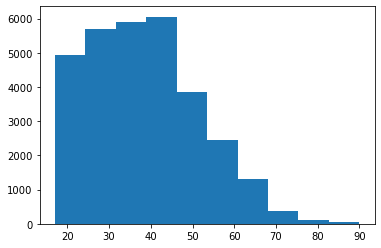

In [57]:
plt.hist(df['Age'])

This is right skewed

(array([2.9954e+04, 5.0800e+02, 8.1000e+01, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5500e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

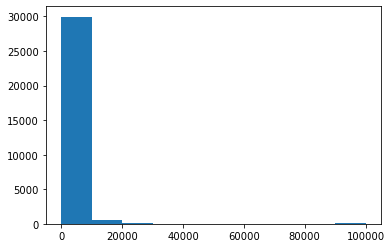

In [59]:
plt.hist(df['Capital_gain'])

Right skewed

(array([2.9251e+04, 1.7000e+01, 2.0000e+01, 4.3600e+02, 7.6400e+02,
        1.9500e+02, 1.3000e+01, 0.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

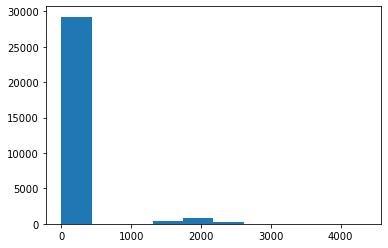

In [60]:
plt.hist(df['Capital_loss'])

For captial gain and loss columns, most of the values are zero

(array([1.2579e+04, 1.4282e+04, 3.2670e+03, 4.4300e+02, 9.6000e+01,
        1.7000e+01, 9.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  13769. ,  160862.6,  307956.2,  455049.8,  602143.4,  749237. ,
         896330.6, 1043424.2, 1190517.8, 1337611.4, 1484705. ]),
 <BarContainer object of 10 artists>)

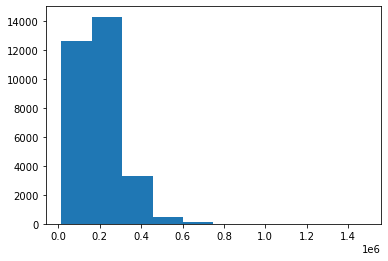

In [61]:
plt.hist(df['Fnlwgt'])

This is also right skewed.

lets check the correlation between columns

<AxesSubplot:>

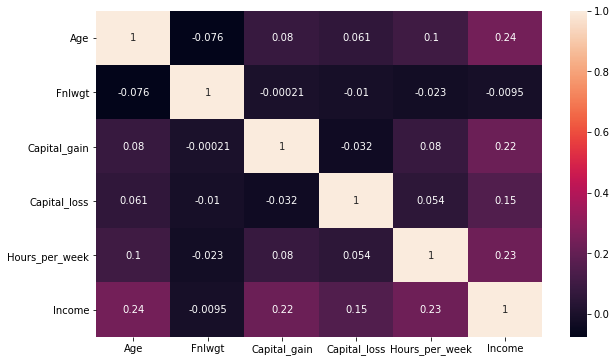

In [63]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True)

We can see that there isnt much of correlation between income and independent variables

Fnlwgt column has almost 0 correlation, hence, we can remove this columns from our modelling

In [64]:
df.drop(columns=['Fnlwgt'],inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30703 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30703 non-null  int64 
 1   Workclass       30703 non-null  object
 2   Education       30703 non-null  object
 3   Marital_status  30703 non-null  object
 4   Occupation      30703 non-null  object
 5   Relationship    30703 non-null  object
 6   Race            30703 non-null  object
 7   Sex             30703 non-null  object
 8   Capital_gain    30703 non-null  int64 
 9   Capital_loss    30703 non-null  int64 
 10  Hours_per_week  30703 non-null  int64 
 11  Native_country  30703 non-null  object
 12  Income          30703 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 3.2+ MB


In [67]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

We can notice that there are few ? values in country column also

In [68]:
(df['Native_country'] == ' ?').sum()

556

In [69]:
((30703 - 556 )/32560) - 1

-0.0741093366093366

7.4 % data loss, if we remove the rows with values ?

In [70]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)

In [71]:
df.shape

(30147, 13)

In [72]:
30703-556

30147

We have removed all the rows with ? values

<AxesSubplot:xlabel='Age', ylabel='Income'>

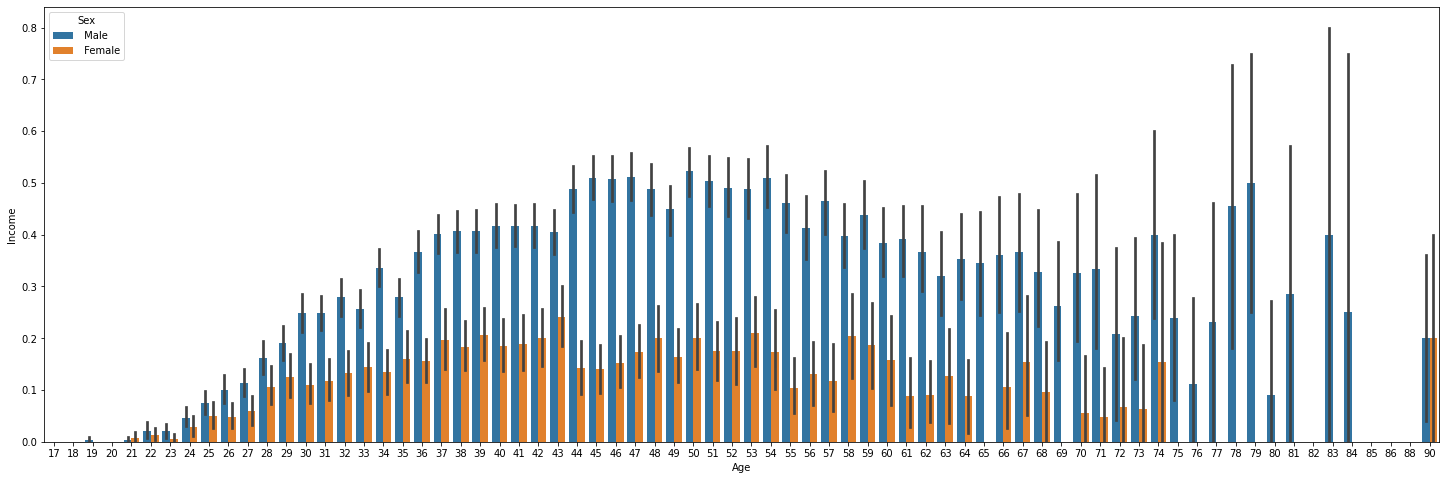

In [77]:
plt.figure(figsize = (25,8))
sns.barplot(x=df['Age'],y=df['Income'],hue=df['Sex'])

Here we can notice that the income increases as age increases to 60's and doesnt follow a pattern after that

<AxesSubplot:xlabel='Income', ylabel='Education'>

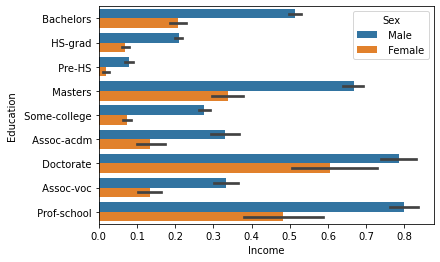

In [78]:
sns.barplot(x=df['Income'],y=df['Education'],hue=df['Sex'])

Men getter higher income than women at any profession as inferred by the above graph

<AxesSubplot:xlabel='Income', ylabel='Race'>

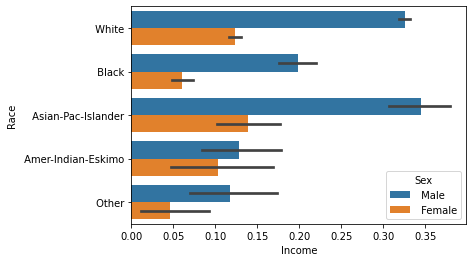

In [80]:
sns.barplot(x=df['Income'],y=df['Race'],hue=df['Sex'])b

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

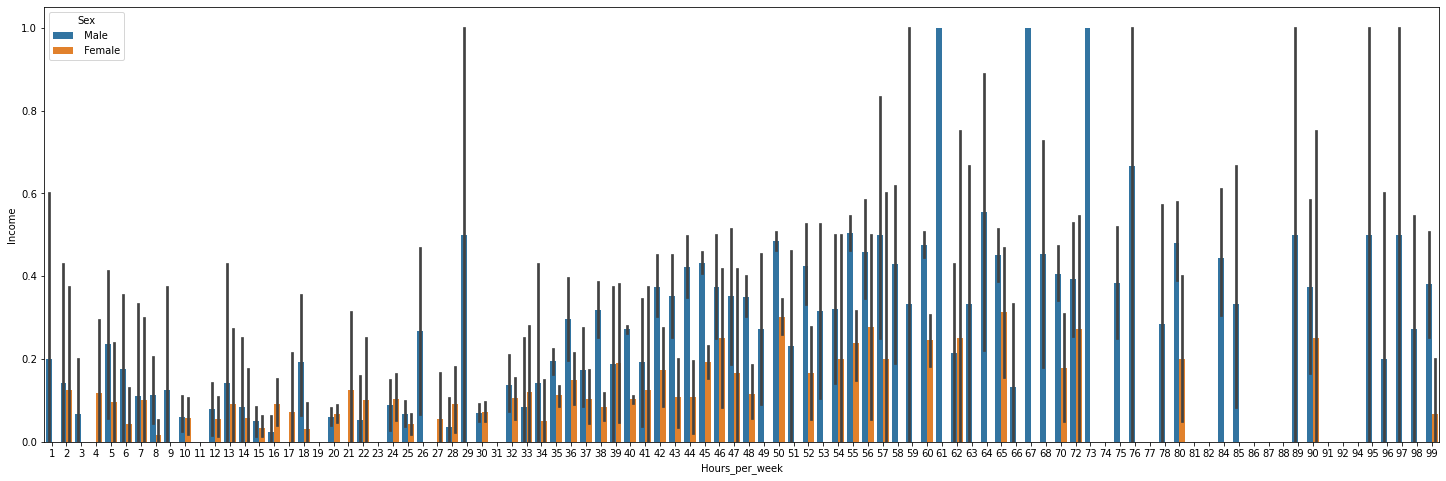

In [82]:
plt.figure(figsize = (25,8))
sns.barplot(x=df['Hours_per_week'],y=df['Income'],hue=df['Sex'])

It looks that as hours increase, the income increases.

Here, lets divide the no.of.hours into three classes:

standard working hours, less and more than that.

In [83]:
df['Hours_per_week'] = pd.cut(df['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Under time', 'Standard', 'Overtime'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

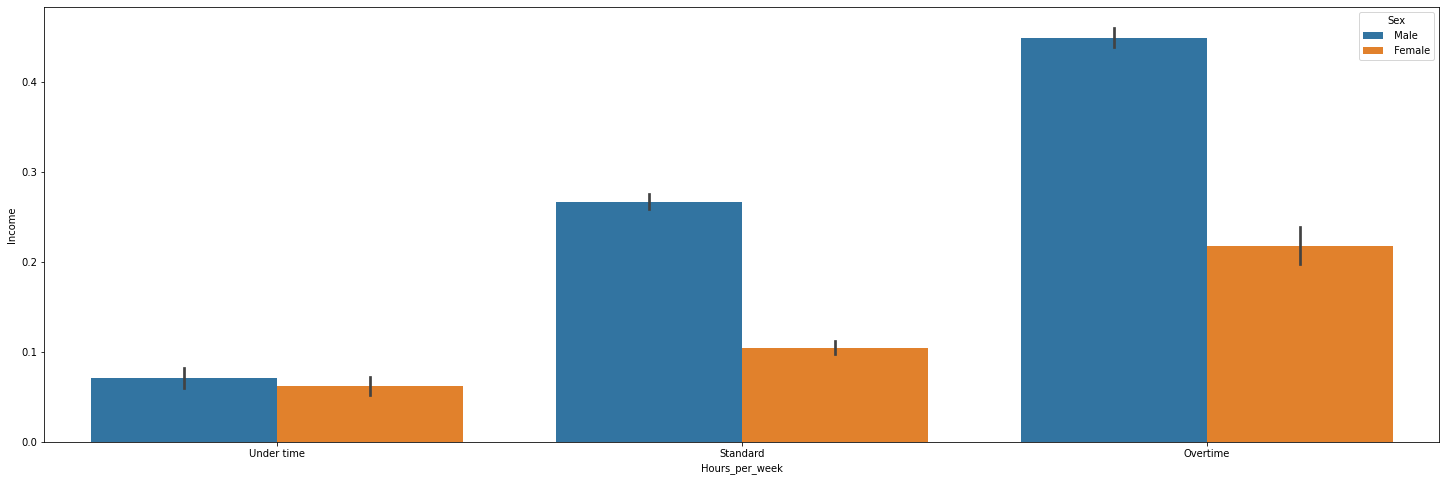

In [84]:
plt.figure(figsize = (25,8))
sns.barplot(x=df['Hours_per_week'],y=df['Income'],hue=df['Sex'])

In [85]:
df.skew()

Age              0.530284
Capital_gain    11.899926
Capital_loss     4.525094
Income           1.160643
dtype: float64

As income is our target variables, lets ignore its skew.

Age skew is near to acceptable criteria of 0.5

Lets try removing the skew from capital columns.

As they have 0 as value in some rows, log and reciprocal transformations wont work.

Lets check with sqrt and cbrt 

In [86]:
np.sqrt(df['Capital_gain']).skew()

5.82569725657291

In [87]:
np.cbrt(df['Capital_gain']).skew()

4.055147547647643

the skew is reduced for this column but its not still acceptable.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

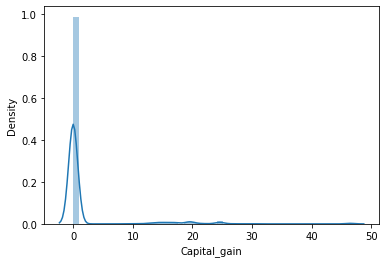

In [88]:
sns.distplot(np.cbrt(df['Capital_gain']))

We have reduced the skew, but still since, it has many rows with 0 values, it is further very hard to reduce the skew.

lets go with cbrt transformation

In [89]:
df['Capital_gain'] = np.cbrt(df['Capital_gain'])

In [90]:
df['Capital_loss'] = np.cbrt(df['Capital_loss'])

In [91]:
df['Capital_loss'].skew()

4.298821077190199

Though we expected much skewness to be handled, it is a minute adjustment

In [94]:
df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,Under time,United-States,0
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,Standard,United-States,0
2,53,Private,Pre-HS,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,Standard,United-States,0
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,Standard,Cuba,0
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,Standard,United-States,0


Now lets encode the categorical variables before modelling

In [95]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [96]:
enc_cols = ['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Hours_per_week', 'Native_country']

In [97]:
df['Sex'] = le.fit_transform(df['Sex'])

In [98]:
copy = df.copy()
for i in enc_cols:
    dum = pd.get_dummies(df[i])
    
    copy = pd.concat([copy,dum],axis=1)
    

In [101]:
copy.drop(columns = enc_cols,inplace=True)

In [102]:
copy.head()

,Age,Sex,Capital_gain,Capital_loss,Income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,1,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,1,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,1,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
copy.dtypes

Age                   int64
Sex                   int32
Capital_gain        float64
Capital_loss        float64
Income                int32
                     ...   
 Thailand             uint8
 Trinadad&Tobago      uint8
 United-States        uint8
 Vietnam              uint8
 Yugoslavia           uint8
Length: 96, dtype: object

In [104]:
X = copy.drop(columns = ['Income'])
Y = copy['Income']

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

The data has been scaled and ready to be modelled.

In [107]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,test_size=0.3,random_state = 55)

The data has been split into training and testing data

Now lets use classification models. Since, it is a binary classification, lets start with logistic regression

In [108]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(xtrain,ytrain)
predlr = lr.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(ytest,predlr))
print(confusion_matrix(ytest,predlr))
print(classification_report(ytest,predlr))

0.8436705362078496
[[6272  552]
 [ 862 1359]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6824
           1       0.71      0.61      0.66      2221

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045



The f1 score for 0 is .90 and 1 is .66

In [110]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(xtrain,ytrain)

preddt = dtc.predict(xtest)

print(accuracy_score(ytest,preddt))
print(confusion_matrix(ytest,preddt))
print(classification_report(ytest,preddt))

0.8151464897733555
[[6028  796]
 [ 876 1345]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6824
           1       0.63      0.61      0.62      2221

    accuracy                           0.82      9045
   macro avg       0.75      0.74      0.75      9045
weighted avg       0.81      0.82      0.81      9045



The f1 score for decision tree is less than logistic regression.

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

predrf = rf.predict(xtest)

print(accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

0.8350469872857933
[[6173  651]
 [ 841 1380]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6824
           1       0.68      0.62      0.65      2221

    accuracy                           0.84      9045
   macro avg       0.78      0.76      0.77      9045
weighted avg       0.83      0.84      0.83      9045



In [112]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(xtrain, ytrain)

predsv = sv.predict(xtest)

print(accuracy_score(ytest,predsv))
print(confusion_matrix(ytest,predsv))
print(classification_report(ytest,predsv))


0.8389165284687673
[[6305  519]
 [ 938 1283]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6824
           1       0.71      0.58      0.64      2221

    accuracy                           0.84      9045
   macro avg       0.79      0.75      0.77      9045
weighted avg       0.83      0.84      0.83      9045



All the models accuracy score looks almost similar. Lets check with cross_val_score



In [113]:
from sklearn.model_selection import cross_val_score

cvsl = cross_val_score(lr,scaledX,Y,cv=5,scoring='f1')
print('lr',cvsl.mean())

cvsd = cross_val_score(dtc,scaledX,Y,cv=5,scoring='f1')
print('dtc',cvsd.mean())

cvsr = cross_val_score(rf,scaledX,Y,cv=5,scoring='f1')
print('rf', cvsr.mean())

cvss = cross_val_score(sv,scaledX,Y,cv=5,scoring='f1')
print('sv',cvss.mean())

lr 0.6569878126270459
dtc 0.6231846823629706
rf 0.6558501690038836
sv 0.646461735225501


In [114]:
cvsl = cross_val_score(lr,xtest,ytest,cv=5,scoring='f1')
print('lr',cvsl.mean())

cvsd = cross_val_score(dtc,xtest,ytest,cv=5,scoring='f1')
print('dtc',cvsd.mean())

cvsr = cross_val_score(rf,xtest,ytest,cv=5,scoring='f1')
print('rf', cvsr.mean())

cvss = cross_val_score(sv,xtest,ytest,cv=5,scoring='f1')
print('sv',cvss.mean())

lr 0.6457174437591162
dtc 0.6111641217208306
rf 0.6435198811480694
sv 0.617493341761662


We can see there is much difference between models accuracy scores and cross val scores

In [115]:
print('lr', 0.8436705362078496 - 0.6457174437591162)

lr 0.19795309244873338


In [116]:
print('dtc', 0.8436705362078496 - 0.6111641217208306)
print('rf', 0.8350469872857933 - 0.6435198811480694)
print('sv', 0.8389165284687673 - 0.617493341761662)

dtc 0.23250641448701903
rf 0.19152710613772395
sv 0.22142318670710526


The random forest classifier model has the minimal difference.

we will proceed with the random forest classifier

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameters = {'max_depth':np.arange(2,20) , 'criterion':['gini','entropy']}
gcv = GridSearchCV(rf,parameters,cv=5)

In [119]:
gcv.fit(xtrain,ytrain)

print(accuracy_score(ytest, gcv.predict(xtest)))

0.8599226091763406


In [120]:
print(gcv.best_params_)

{'criterion': 'entropy', 'max_depth': 17}


In [121]:
rf_mod = RandomForestClassifier(max_depth = 17, criterion = 'entropy')

rf_mod.fit(xtrain,ytrain)

predrm = rf_mod.predict(xtest)

print(accuracy_score(ytest,predrm))
print(confusion_matrix(ytest,predrm))
print(classification_report(ytest,predrm))

0.8604754007739083
[[6420  404]
 [ 858 1363]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6824
           1       0.77      0.61      0.68      2221

    accuracy                           0.86      9045
   macro avg       0.83      0.78      0.80      9045
weighted avg       0.85      0.86      0.85      9045



Text(0, 0.5, 'True Positive Rate')

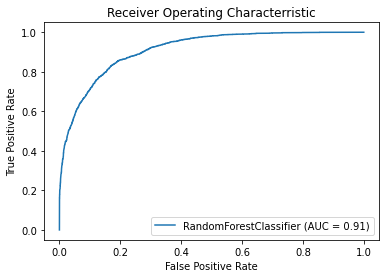

In [123]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_mod,xtest,ytest)
plt.title("Receiver Operating Characterristic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



Classifiers that give curves closer to the top-left corner indicate a better performance.

Hence, The randomf forest classifier is giving the better performance.

the AUC performs well as a general measure of predictive accuracy.

Area under the curve is 91% indicating that the model is performing better with accuracy 91%

In [124]:
import pickle
filename = 'Income.pkl'

pickle.dump(rf_mod,open(filename,'wb'))